In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('laptop_data.csv')

In [3]:
df.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [4]:
df.shape

(1303, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


In [6]:
# Column Ram and Weight should be of integer and float datatypes respectively.

In [7]:
# Dropping Unnamed: 0 column, because it has no use.

df.drop('Unnamed: 0',axis=1,inplace=True)

In [8]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [9]:
# Cleaning Ram and Weight features removing GB and kg strings from respective columns and changing their datatypes

df['Ram'] = df['Ram'].str.replace('GB','').astype('int')
df['Weight'] = df['Weight'].str.replace('kg','').astype('float')

In [10]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080


In [11]:
# Now these two features have right datatype

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float64
 10  Price             1303 non-null   float64
dtypes: float64(3), int32(1), object(7)
memory usage: 107.0+ KB


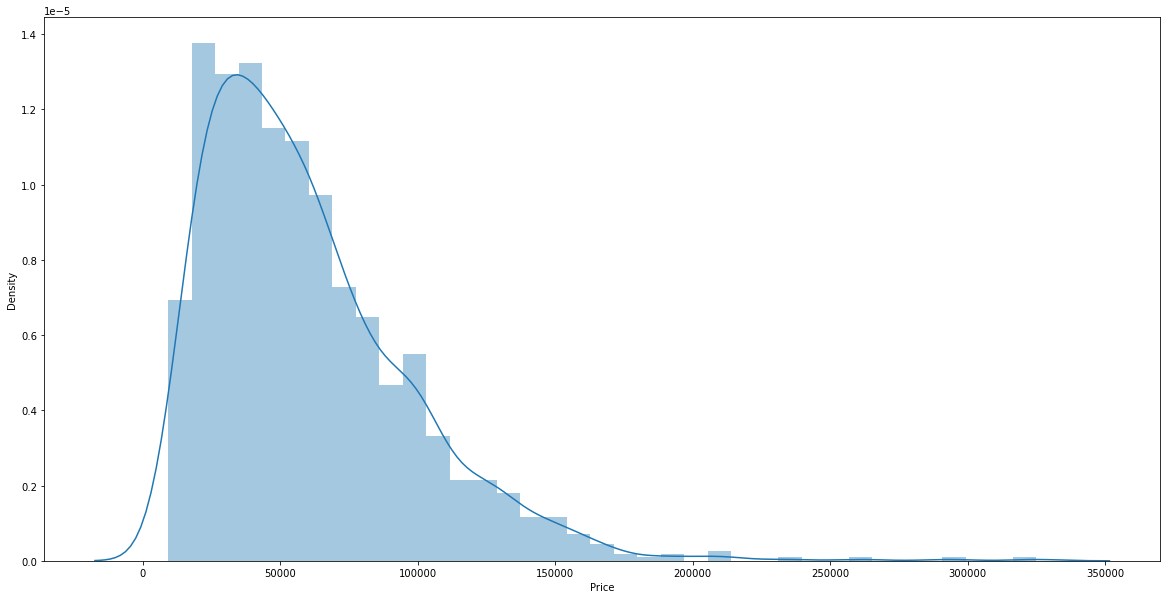

In [12]:
# Plotting distribution plot for price feature

plt.figure(figsize=(20,10))
sns.distplot(df['Price'])
plt.show()

In [13]:
# We can observe that price feature is right skewed because commodities with low values have higher sale quantity 
# than higher value commodities

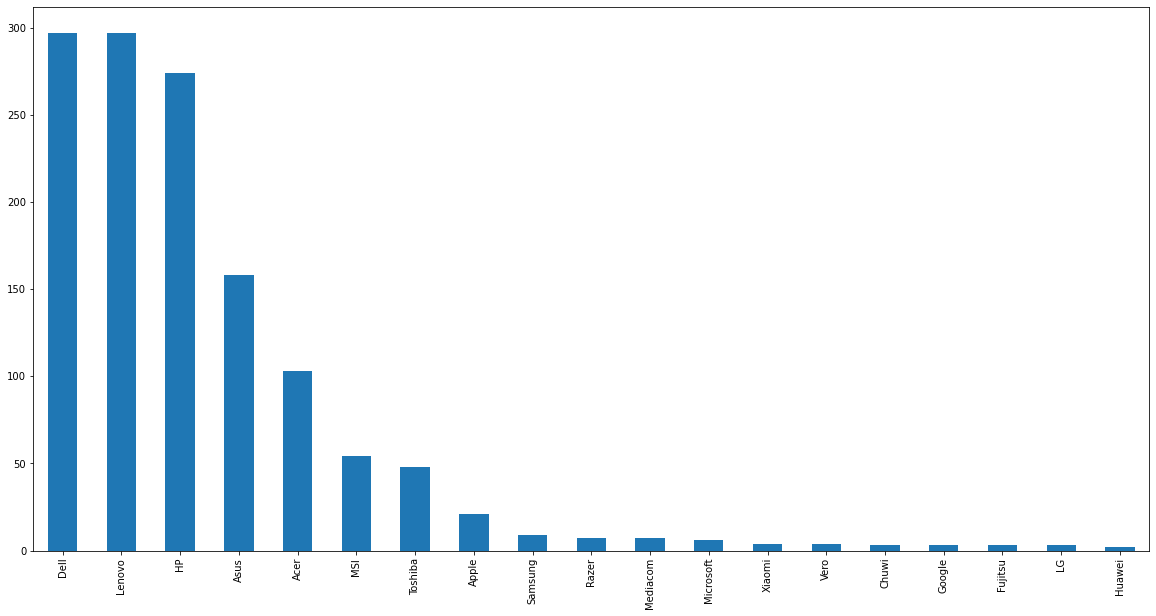

In [14]:
# Analysing different companies present in laptop manufacturing market according to our dataset

plt.figure(figsize=(20,10))
df['Company'].value_counts().plot(kind="bar")
plt.show()

In [15]:
# We can observe that Dell, Lenovo and HP are the market dominant companies

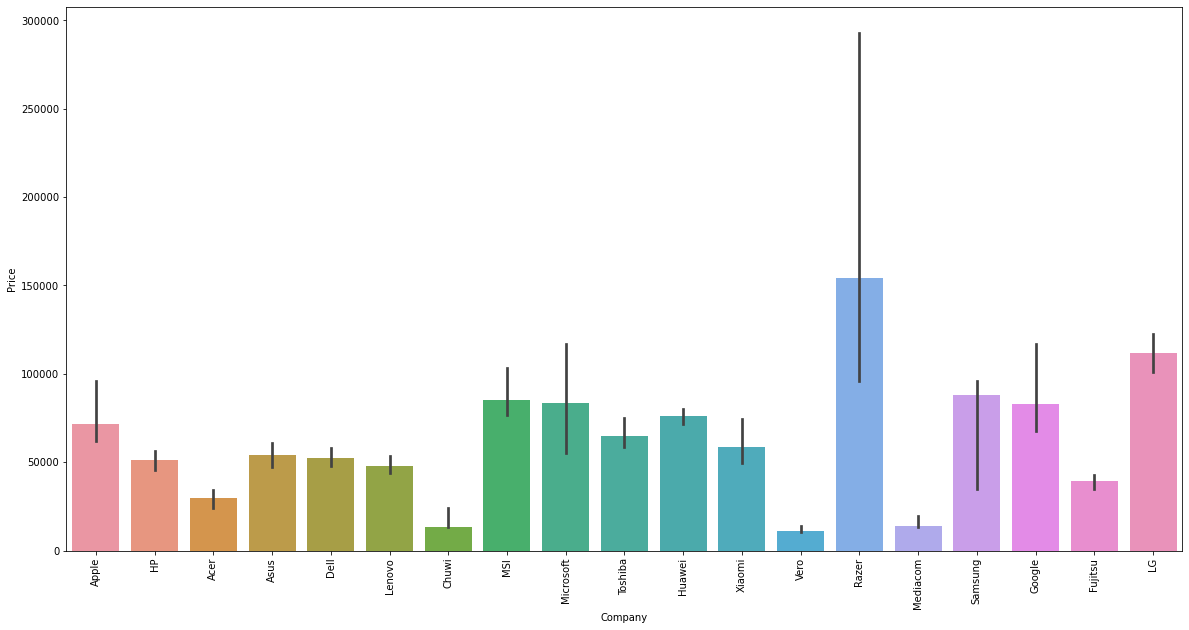

In [16]:
# Now, let's analyse whether we have impact of company name to price of laptop

plt.figure(figsize=(20,10))
sns.barplot(x = df['Company'],y=df['Price'],estimator=np.median)
plt.xticks(rotation='vertical')
plt.show()

In [17]:
# According to the analysis, we do have impact of company name on price feature,
# Razer, LG, MSI, Apple, Microsoft, Google have high mean value laptop prices than the rest

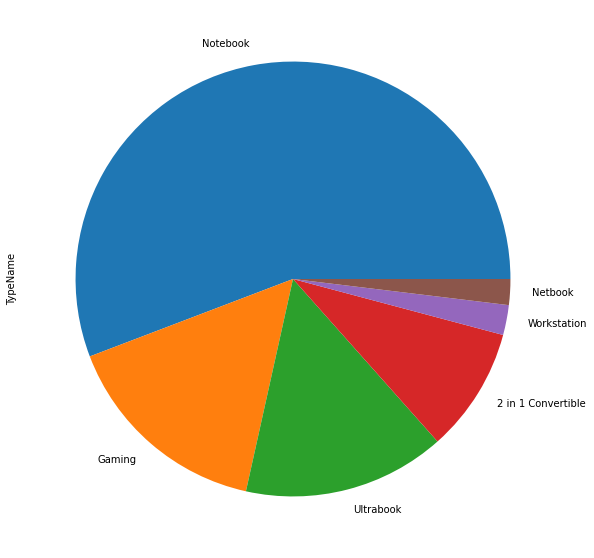

In [18]:
# Analysing TypeName feature

plt.figure(figsize=(10,10))
df['TypeName'].value_counts().plot(x = df['TypeName'], y= df['Price'], kind='pie')
plt.show()

In [19]:
# Notebook type laptops have highest counts among all types of laptops

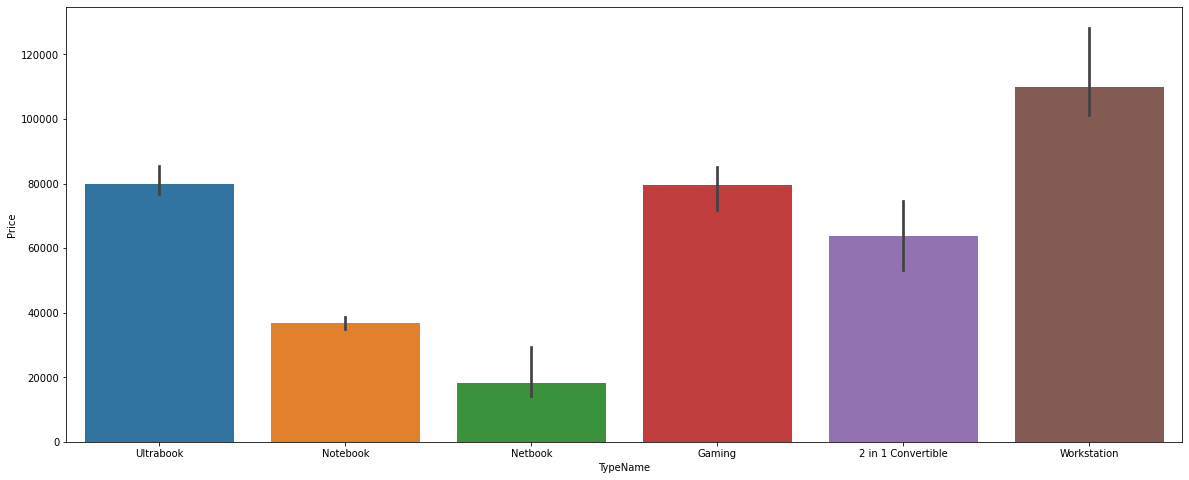

In [20]:
# Analysing mean price of each category in TypeName feature

plt.figure(figsize=(20,8))
sns.barplot(x= df['TypeName'], y= df['Price'],estimator=np.median)
plt.show()

In [21]:
# Category Workstation has the highest mean value.
# Gaming laptop have second rank among them

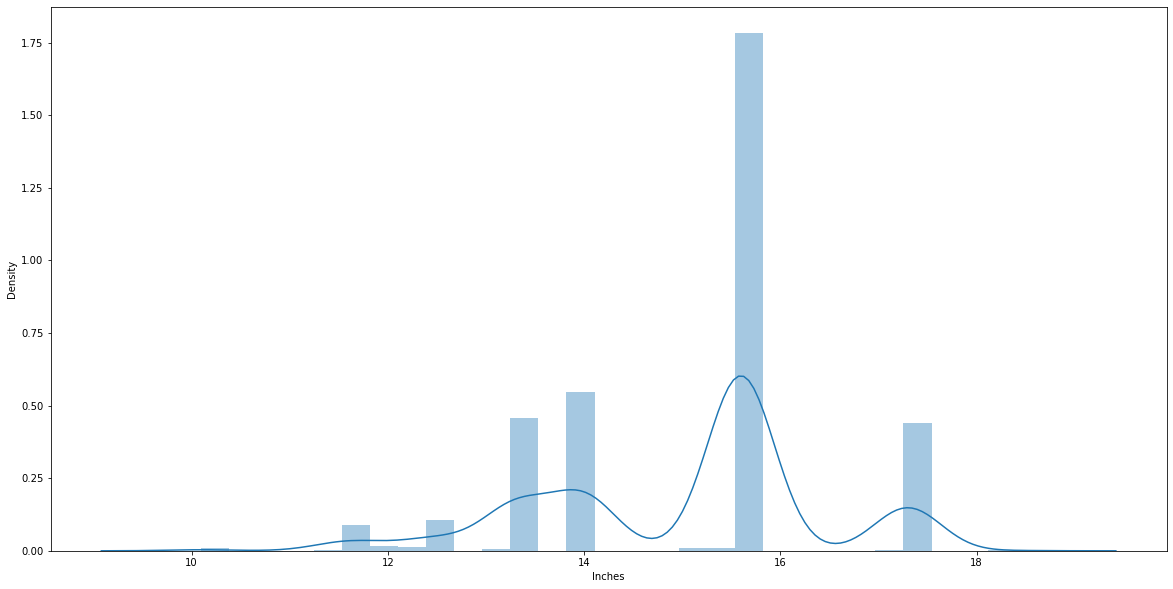

In [22]:
# Analysing Inches column counts

plt.figure(figsize=(20,10))
sns.distplot(df['Inches'])
plt.show()

In [23]:
# 16 inches laptops have highest counts among all the screen sizes laptops

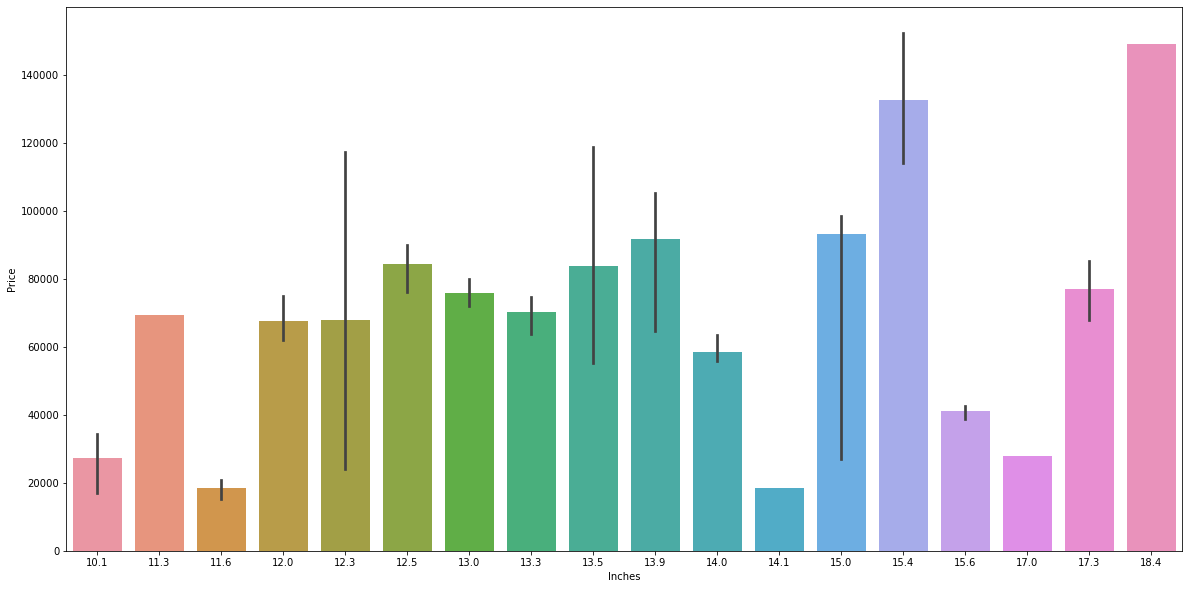

In [24]:
plt.figure(figsize=(20,10))
sns.barplot(x=df['Inches'],y=df['Price'],estimator=np.median)
plt.show()

In [25]:
# Inches feature do also have some impact on price feature

In [26]:
df['ScreenResolution'].value_counts()

Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x1440               

In [27]:
# We do have some information in this feature like

# 1. We can derive whether a laptop have Touchscreen or not
# 2. We can derive whether a laptop have IPS screen or not
# 3. We can derive resolutino of laptops

In [28]:
# 1. Extracting Touchscreen data

# Labelling 1 if touchscreen property present in laptop else 0
df['Touchscreen'] = df['ScreenResolution'].apply(lambda x : 1 if 'Touchscreen' in x else 0)

In [29]:
df.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen
1191,Samsung,2 in 1 Convertible,12.3,IPS Panel Touchscreen 2400x1600,Samsung Cortex A72&A53 2.0GHz,4,32GB Flash Storage,ARM Mali T860 MP4,Chrome OS,1.15,35111.52,1
593,Samsung,Notebook,15.6,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16,128GB SSD + 1TB HDD,Nvidia GeForce GTX 1050,Windows 10,2.50,90522.72,0
898,Dell,Notebook,15.6,1366x768,Intel Core i3 6006U 2.0GHz,4,1TB HDD,AMD Radeon R5 M420X,Windows 10,2.18,32713.92,0
121,MSI,Gaming,15.6,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16,256GB SSD + 2TB HDD,Nvidia GeForce GTX 1070,Windows 10,1.80,119427.12,0
450,HP,Notebook,15.6,1366x768,Intel Core i5 7200U 2.5GHz,8,128GB SSD,Intel HD Graphics 620,Windows 10,1.91,31381.92,0


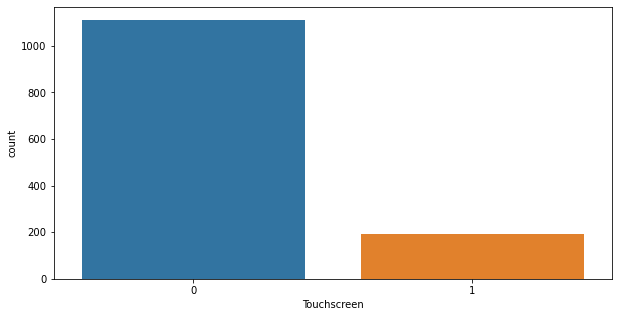

In [30]:
# Visualizing count of Touchscreen feature

plt.figure(figsize=(10,5))
sns.countplot(df['Touchscreen'])
plt.show()

In [31]:
# We do have imbalanced Touchscreen feature

<AxesSubplot:xlabel='Touchscreen', ylabel='Price'>

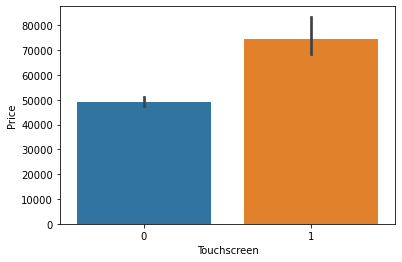

In [32]:
# Analysing whether our derived feature have impact on prices

sns.barplot(x=df['Touchscreen'],y=df['Price'],estimator=np.median)

In [33]:
# According to chart we can analyse that laptop having Touchscreen have high prices

In [34]:
# 2. Extracting IPS screen data

# Labelling 1 if IPS Panel property present in laptop else 0
df['IPS'] = df['ScreenResolution'].apply(lambda x : 1 if "IPS Panel" in x else 0 )

In [35]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1


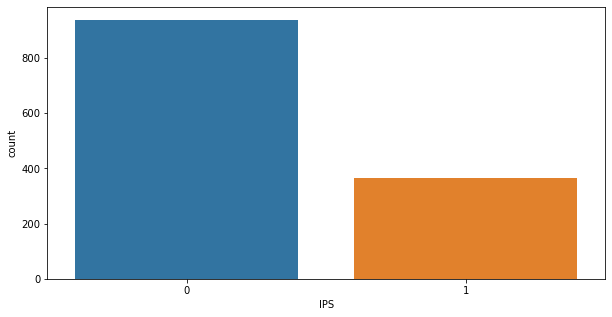

In [36]:
# Visualizing count of IPS feature

plt.figure(figsize=(10,5))
sns.countplot(df['IPS'])
plt.show()

In [37]:
# We do have imbalanced IPS feature

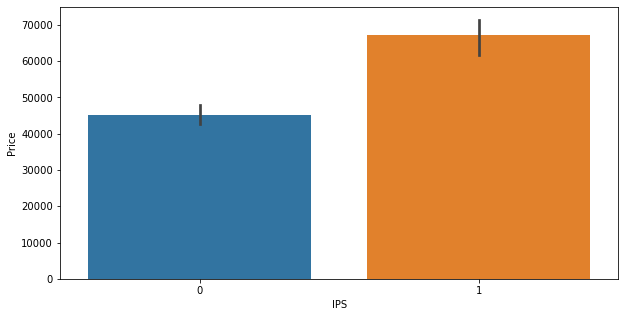

In [38]:
# Analysing whether IPS feature have impact on price

plt.figure(figsize=(10,5))
sns.barplot(x=df['IPS'],y=df['Price'],estimator=np.median)
plt.show()

In [39]:
# IPS feature also have impact on price of laptops

In [40]:
# 3. Deriving resolution of laptops and assigning them as int data type

df['x_res'] = df['ScreenResolution'].str.split(" ").apply(lambda x : x[-1]).str.split("x").apply(lambda y : y[0]).astype('int')
df['y_res'] = df['ScreenResolution'].str.split(" ").apply(lambda x : x[-1]).str.split("x").apply(lambda y : y[1]).astype('int')

In [41]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,x_res,y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600


In [42]:
# Going through correlation of different features with price

df.corr()

,Inches,Ram,Weight,Price,Touchscreen,IPS,x_res,y_res
Inches,1.000000,0.237993,0.827631,0.068197,-0.361735,-0.114804,-0.071245,-0.095404
Ram,0.237993,1.000000,0.383874,0.743007,0.116984,0.206623,0.433121,0.424437
Weight,0.827631,0.383874,1.000000,0.210370,-0.294620,0.016967,-0.032880,-0.053846
Price,0.068197,0.743007,0.210370,1.000000,0.191226,0.252208,0.556529,0.552809
Touchscreen,-0.361735,0.116984,-0.294620,0.191226,1.000000,0.150512,0.351066,0.357930
IPS,-0.114804,0.206623,0.016967,0.252208,0.150512,1.000000,0.281457,0.289030
x_res,-0.071245,0.433121,-0.032880,0.556529,0.351066,0.281457,1.000000,0.994219
y_res,-0.095404,0.424437,-0.053846,0.552809,0.357930,0.289030,0.994219,1.000000


In [43]:
# We can observe that feature Ram, x_res, y_res have good correlation with price of laptops but x_res and y_res have high 
# correlation among them which cause multicollinearity in data

In [44]:
# Now, as per the concept of ppi(pixels per inch) we can derive a new feature using x_res, y_res and Inches features which will
# also remove multicollinearity

# Formula for ppi = (((No. of pixels in X)**2)*((No. of pixels in Y)**2)**0.5) / (Inches)

df['ppi'] = ((((df['x_res'])**2) + ((df['y_res'])**2))**0.5 / df['Inches']).astype('float')

In [45]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,x_res,y_res,ppi
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600,226.983005
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900,127.677940
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080,141.211998
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800,220.534624
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600,226.983005


In [46]:
# Dropping the columns having no use now

df.drop(['Inches','x_res','y_res','ScreenResolution'],axis=1,inplace=True)

In [47]:
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,ppi
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005


In [48]:
df.corr()['Price']

Ram            0.743007
Weight         0.210370
Price          1.000000
Touchscreen    0.191226
IPS            0.252208
ppi            0.473487
Name: Price, dtype: float64

In [49]:
# Extracting Processors from Cpu feature

In [50]:
df['Cpu'].value_counts()

Intel Core i5 7200U 2.5GHz       190
Intel Core i7 7700HQ 2.8GHz      146
Intel Core i7 7500U 2.7GHz       134
Intel Core i7 8550U 1.8GHz        73
Intel Core i5 8250U 1.6GHz        72
                                ... 
Intel Core M M3-6Y30 0.9GHz        1
AMD A9-Series 9420 2.9GHz          1
Intel Core i3 6006U 2.2GHz         1
AMD A6-Series 7310 2GHz            1
Intel Xeon E3-1535M v6 3.1GHz      1
Name: Cpu, Length: 118, dtype: int64

In [51]:
df['CpuName'] = df['Cpu'].apply(lambda x : " ".join(x.split(' ')[0:3])) 

# join will convert list of split words to a single string

In [52]:
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,ppi,CpuName
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5


In [53]:
# We are diving processors into 5 segments : Intel Core i5, Intel Core i7, Intel Core i3, Other Intel Proccessor and Amd Processors

def processor(text):
    if text == 'Intel Core i5' or text == 'Intel Core i7' or text == 'Intel Core i3':
        return text
    elif(text.split(' ')[0] == 'Intel'):
        return 'Other Intel Processor'
    else:
        return 'Amd Processor'

In [54]:
df['CpuBrand'] = df['CpuName'].apply(processor) # Applying processor method on CpuName feature

In [55]:
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,ppi,CpuName,CpuBrand
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,Intel Core i5


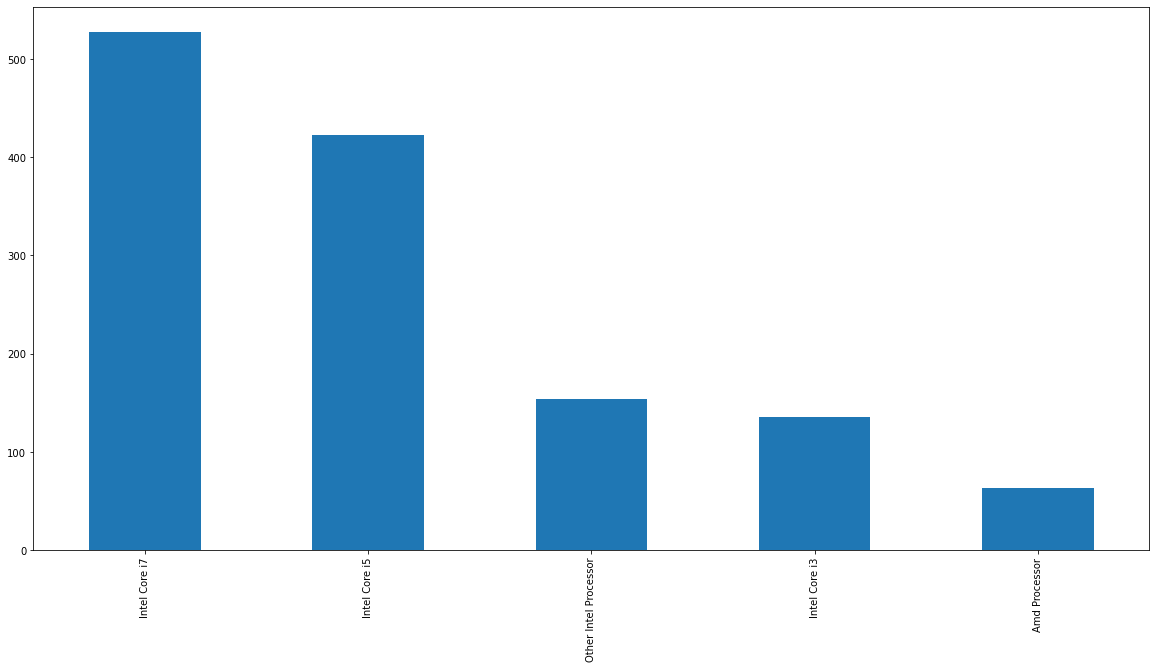

In [56]:
# Analysing CpuBrand feature

plt.figure(figsize=(20,10))
df['CpuBrand'].value_counts().plot(kind='bar')
plt.show()

In [57]:
# We can observe that Intel Core i7 Class have highest no. of counts

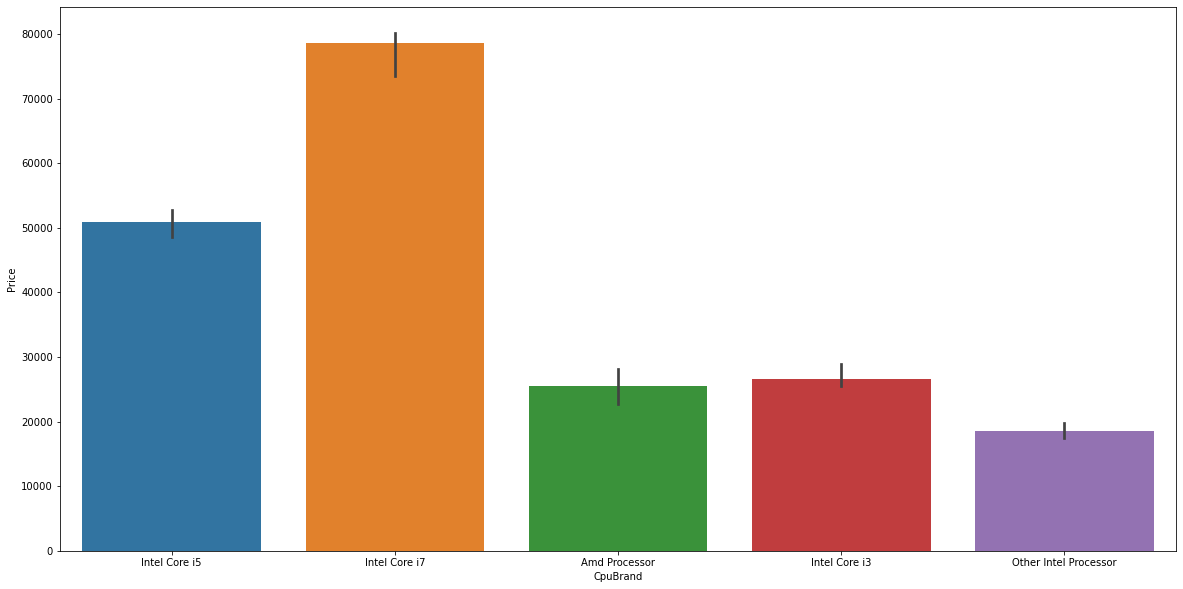

In [58]:
# CpuBrand and Price analysis

plt.figure(figsize=(20,10))
sns.barplot(x=df['CpuBrand'], y = df['Price'],estimator=np.median)
plt.show()

In [59]:
# According to the chart, laptops with Intel Core i7 have the highest mean price among all laptop processors

In [60]:
# Dropping Cpu and CpuName features because required data has extracted

df.drop(['Cpu','CpuName'],axis=1,inplace=True)

In [61]:
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,ppi,CpuBrand
0,Apple,Ultrabook,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5
2,HP,Notebook,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5


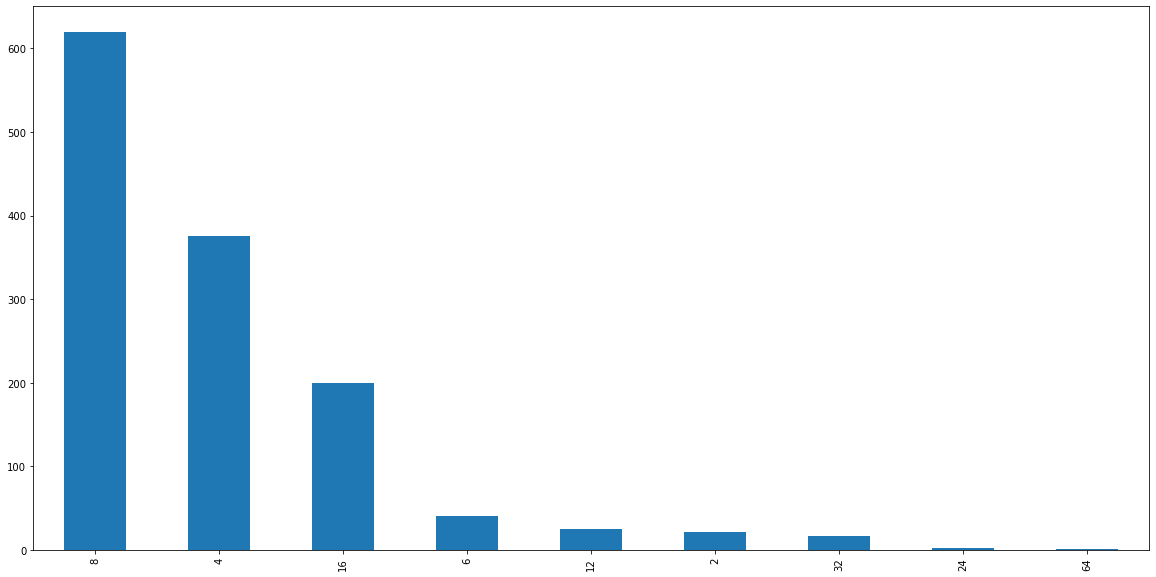

In [62]:
# Moving towards Ram feature

plt.figure(figsize=(20,10))
df['Ram'].value_counts().plot(kind='bar')
plt.show()

In [63]:
# We can analyse that laptops having 8 GB, 4 GB, 16 GB are in high counts

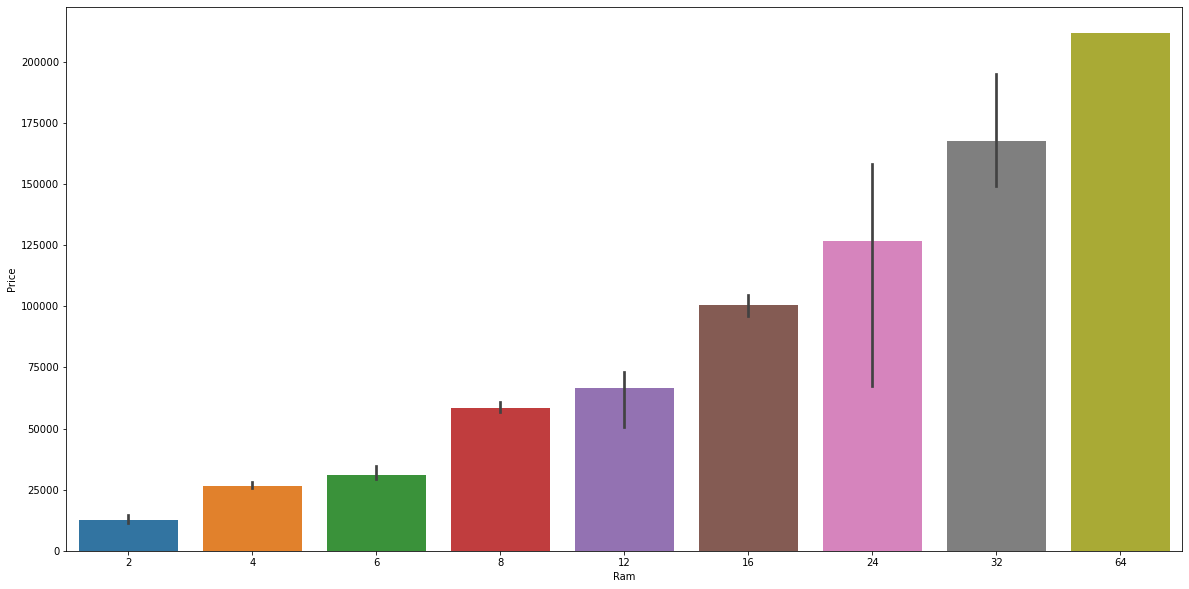

In [64]:
# Plotting Ram feature with Price feature

plt.figure(figsize=(20,10))
sns.barplot(x=df['Ram'],y=df['Price'],estimator=np.median)
plt.show()

In [65]:
# We can make an observation that as the Ram size increase price are also increasing

In [66]:
# Preprocessing on Memory feature

df['Memory'].value_counts()

256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
512GB SSD +  1TB HDD              14
1TB SSD                           14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD             1
5

In [67]:
# According to this feature we can observe that we can generate 4 new features SSD, HDD, Flash and Hybrid

In [68]:
df['Memory'] = df['Memory'].str.replace('.0','')
df['Memory'] = df['Memory'].str.replace('GB','')
df['Memory'] = df['Memory'].str.replace('TB','000') 

In [69]:
temp = df["Memory"].str.split("+", expand = True) 
# Splitting our data wrt + and transforming splitted string in two different features
temp

,0,1
0,128 SSD,None
1,128 Flash Storage,None
2,256 SSD,None
3,512 SSD,None
4,256 SSD,None
...,...,...
1298,128 SSD,None
1299,512 SSD,None
1300,64 Flash Storage,None
1301,1000 HDD,None


In [70]:
df['first'] = temp[0]
df['first'] = df["first"].str.strip()
df["Layer1HDD"] = df["first"].apply(lambda x: 1 if "HDD" in x else 0) # Creating Layer1HDD feature and assigning 1 if HDD exists else 0
df["Layer1SSD"] = df["first"].apply(lambda x: 1 if "SSD" in x else 0) # Creating Layer1SSD feature and assigning 1 if SSD exists else 0
df["Layer1Hybrid"] = df["first"].apply(lambda x: 1 if "Hybrid" in x else 0) # Creating Layer1Hybrid feature and assigning 1 if Hybrid exists else 0
df["Layer1Flash_Storage"] = df["first"].apply(lambda x: 1 if "Flash Storage" in x else 0) # Creating Layer1Flash_Storage feature and assigning 1 if Flash_Storage exists else 0
df['first'] = df['first'].apply(lambda x : x.split(' ')[0]) # extracting only values

In [71]:
df['second'] = temp[1]
df['second'].fillna('0',inplace=True) # filling na with string 0
df["Layer2HDD"] = df["second"].apply(lambda x: 1 if "HDD" in x else 0) # Creating Layer2HDD feature and assigning 1 if HDD exists else 0
df["Layer2SSD"] = df["second"].apply(lambda x: 1 if "SSD" in x else 0) # Creating Layer1SSD feature and assigning 1 if SSD exists else 0
df["Layer2Hybrid"] = df["second"].apply(lambda x: 1 if "Hybrid" in x else 0) # Creating Layer1Hybrid feature and assigning 1 if Hybrid exists else 0
df["Layer2Flash_Storage"] = df["second"].apply(lambda x: 1 if "Flash Storage" in x else 0) # Creating Layer1Flash_Storage feature and assigning 1 if Flash_Storage exists else 0
df['second'] = df['second'].str.replace(r'\D', '')  # extracting only values

In [72]:
# Type casting features to integer

df["first"] = df["first"].astype(int)
df["second"] = df["second"].astype(int)

In [73]:
# Creating features which we aimed to create

# Value will get multiply and store to it's relevent unit feature
# All layer named feature have either 1 or 0
# If there is 1 means that unit exists in that feature and rest will be 0 for that row

df["HDD"]=(df["first"]*df["Layer1HDD"]+df["second"]*df["Layer2HDD"])
df["SSD"]=(df["first"]*df["Layer1SSD"]+df["second"]*df["Layer2SSD"])
df["Hybrid"]=(df["first"]*df["Layer1Hybrid"]+df["second"]*df["Layer2Hybrid"])
df["Flash_Storage"]=(df["first"]*df["Layer1Flash_Storage"]+df["second"]*df["Layer2Flash_Storage"])

# Dropping all temporary features

df.drop(columns=['first', 'second', 'Layer1HDD', 'Layer1SSD', 'Layer1Hybrid',
       'Layer1Flash_Storage', 'Layer2HDD', 'Layer2SSD', 'Layer2Hybrid',
       'Layer2Flash_Storage'],inplace=True)

In [74]:
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,ppi,CpuBrand,HDD,SSD,Hybrid,Flash_Storage
0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,0,0
1,Apple,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,0,128
2,HP,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,0,0
3,Apple,Ultrabook,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,0,0
4,Apple,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,0,0


In [75]:
# Dropping Memory feature from dataset

df.drop('Memory',axis=1,inplace=True)

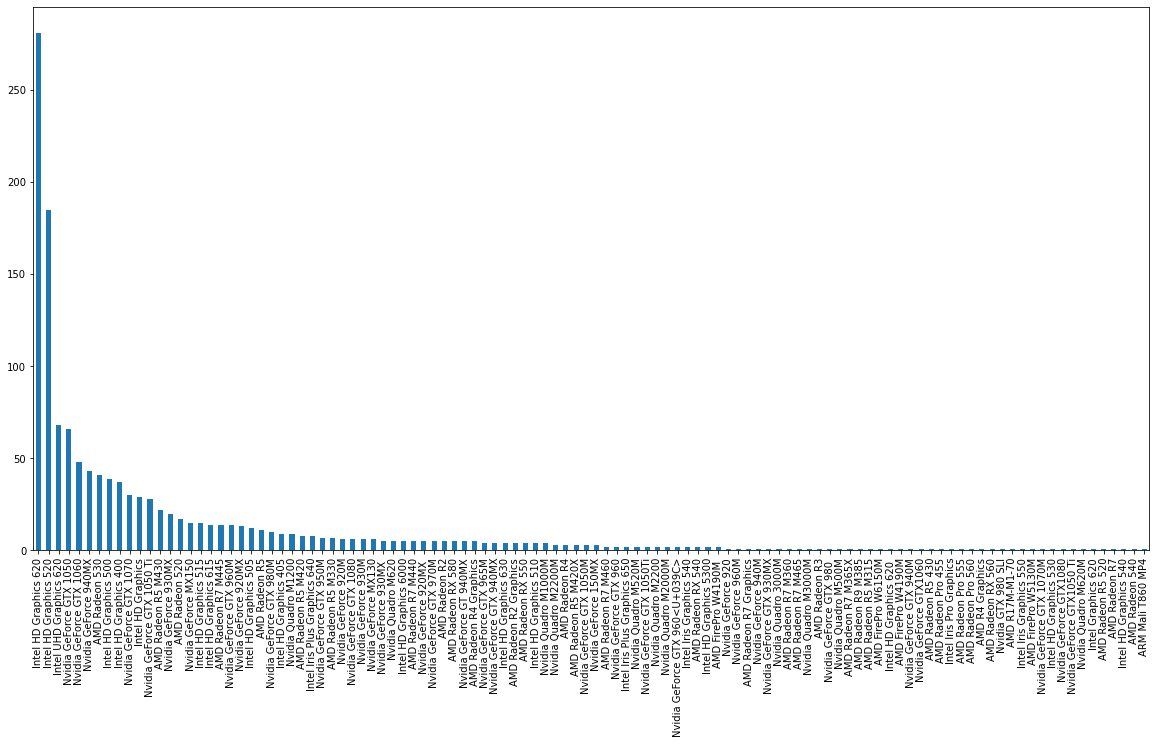

In [76]:
# Preprocessing on Gpu feature

plt.figure(figsize=(20,10))
df['Gpu'].value_counts().plot(kind='bar')
plt.show()

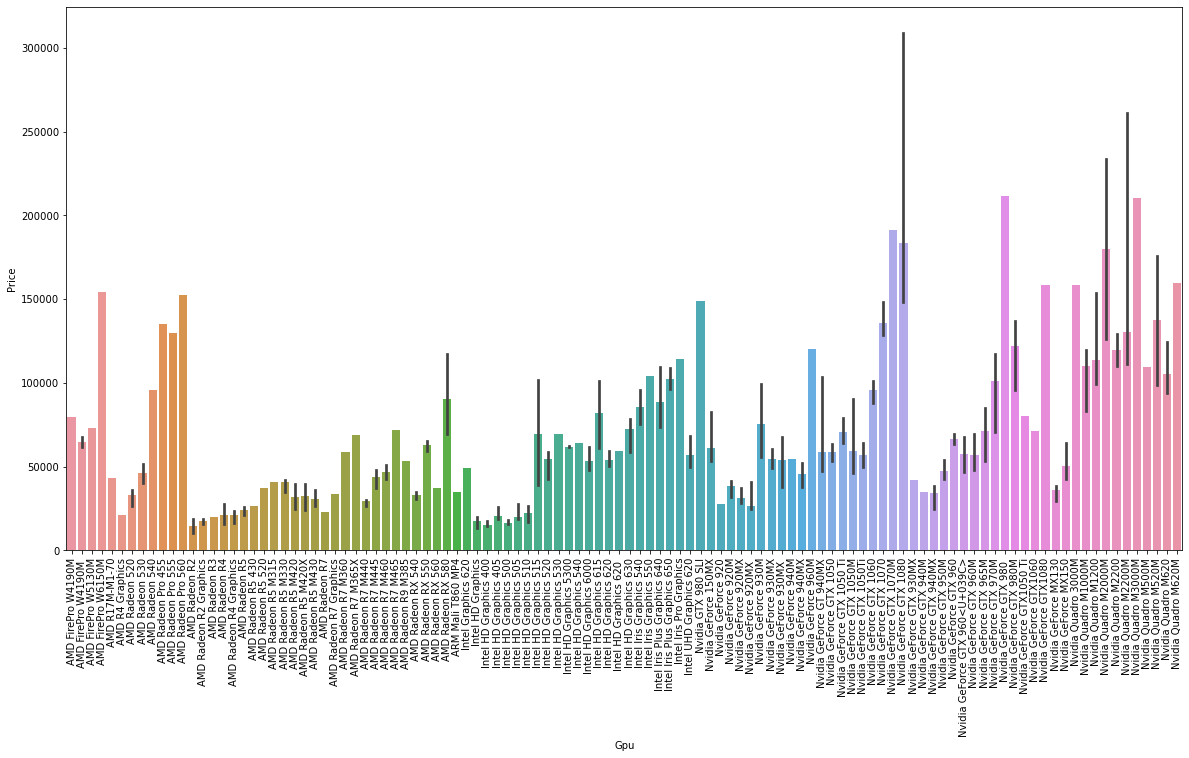

In [77]:
# Let's analyse it with price

plt.figure(figsize=(20,10))
sns.barplot(x=df['Gpu'].sort_values(),y=df['Price'],estimator=np.median)
# sorting chart according to their names so we get brand name sorted chart
plt.xticks(rotation='vertical')
plt.show()

In [78]:
# We can observe that prices are varying very randomly,
# so, we will categories this feature on the basis of their brand name

In [79]:
# Extracting Gpu brand Name from Gpu feature

df['GpuBrand'] = df['Gpu'].apply(lambda x : x.split(' ')[0])

In [80]:
df.drop('Gpu',axis=1,inplace=True)

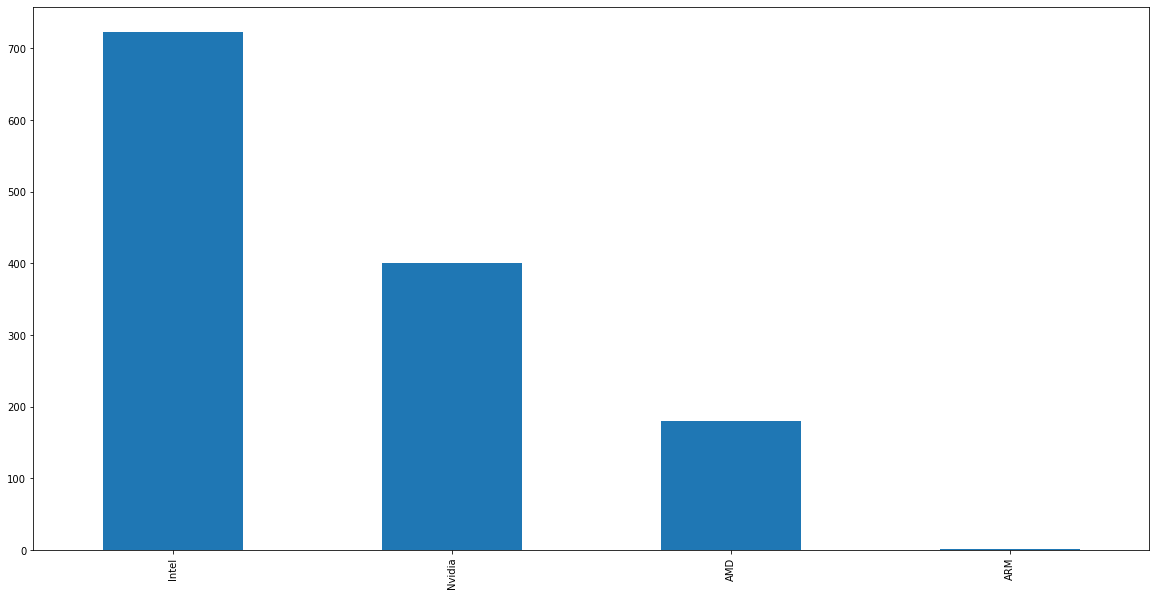

In [81]:
# Plotting countplot of derived column

plt.figure(figsize=(20,10))
df['GpuBrand'].value_counts().plot(kind='bar')
plt.show()

In [82]:
# We can observe that ARM Gpu laptops are in very less quantity which is not helpful so far, so we will drop that row

df = df[df['GpuBrand'] != 'ARM']

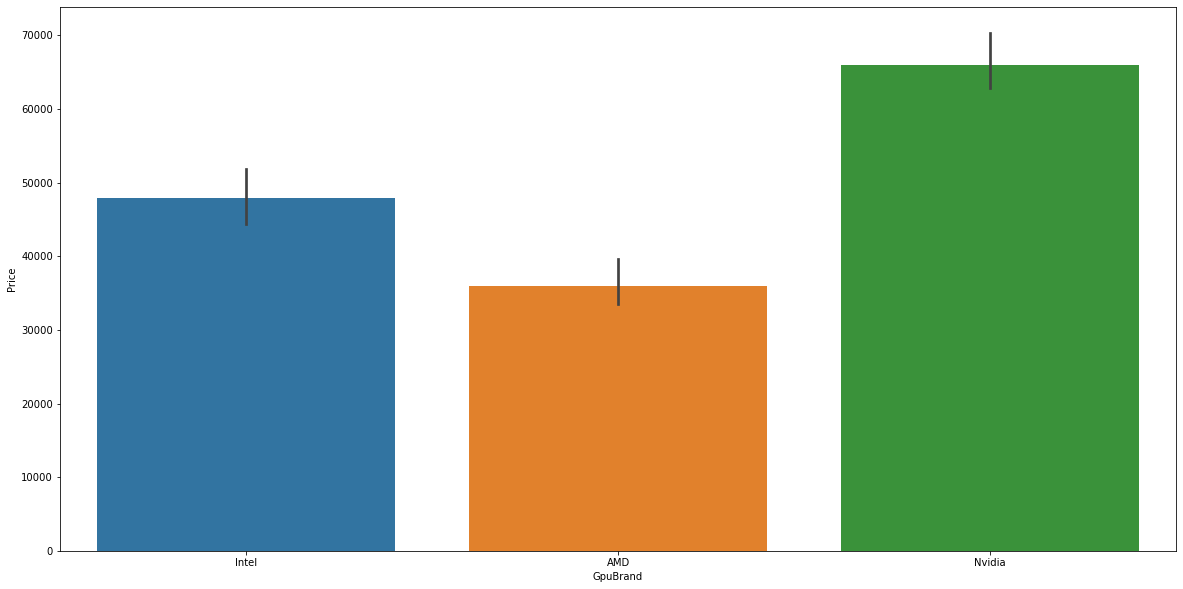

In [83]:
# Analysing GpuBrand feature with Price

plt.figure(figsize=(20,10))
sns.barplot(x=df['GpuBrand'],y=df['Price'],estimator=np.median)
plt.show()

In [84]:
# Laptops having Nvidia Gpu are of more cost compare to other brands.

In [85]:
df.head()

,Company,TypeName,Ram,OpSys,Weight,Price,Touchscreen,IPS,ppi,CpuBrand,HDD,SSD,Hybrid,Flash_Storage,GpuBrand
0,Apple,Ultrabook,8,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,0,0,Intel
1,Apple,Ultrabook,8,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,0,128,Intel
2,HP,Notebook,8,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,0,0,Intel
3,Apple,Ultrabook,16,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,0,0,AMD
4,Apple,Ultrabook,8,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,0,0,Intel


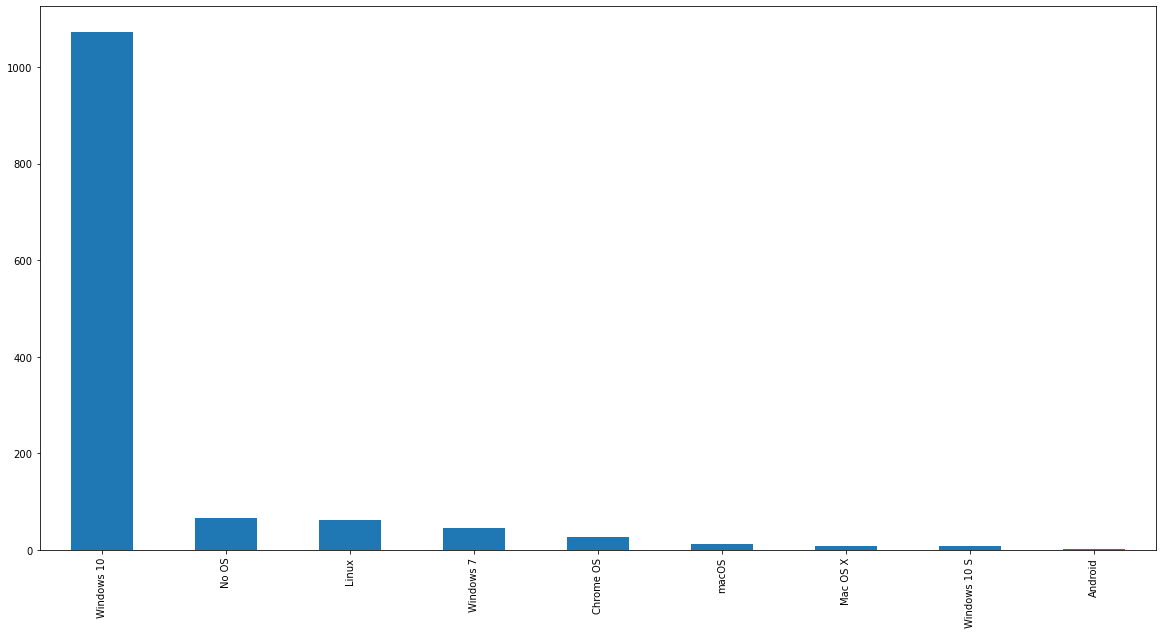

In [86]:
# Moving forward to OpSys (Operating System) feature

plt.figure(figsize=(20,10))
df['OpSys'].value_counts().plot(kind='bar')
plt.show()

In [87]:
# Windows 10 Os has maximum count

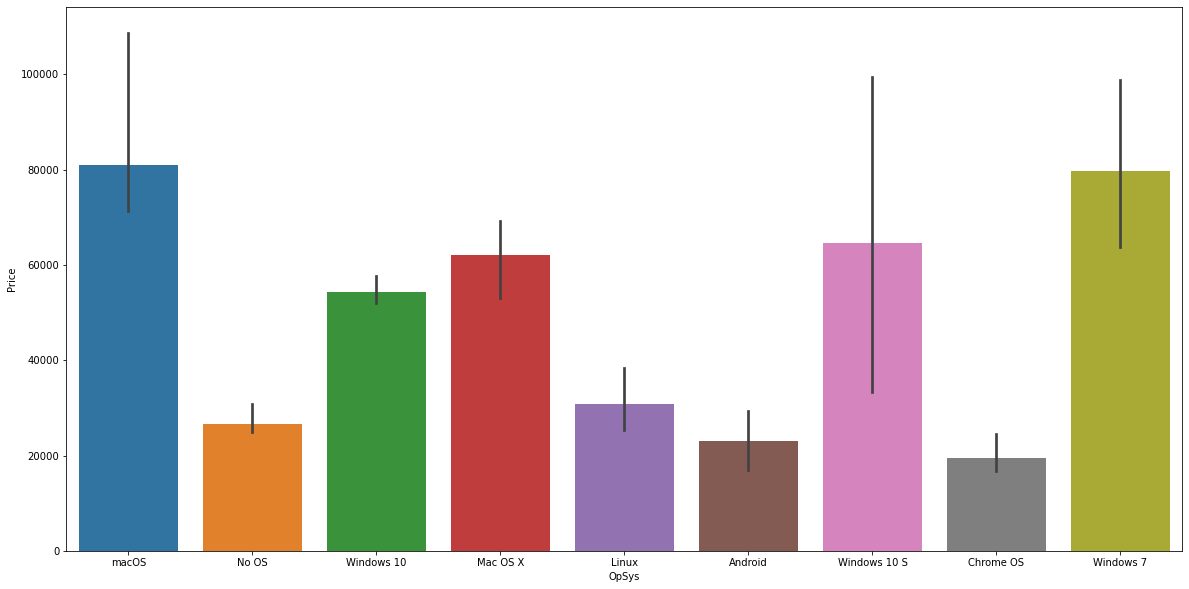

In [88]:
# Its relation with Price

plt.figure(figsize=(20,10))
sns.barplot(x=df['OpSys'],y=df['Price'],estimator=np.median)
plt.show()

In [89]:
# Now we will categories these classes into three categories: Windows, MacOs and Others

In [90]:
# Function for categorising

def OS(text):
    if text == 'Windows 10' or text == 'Windows 7' or text == 'Windows 10 S':
        return 'Windows'
    elif text == 'macOS' or text == 'Mac OS X':
        return 'Mac OS'
    else:
        return 'Others'

In [91]:
df['OpSys'] = df['OpSys'].apply(OS) # Applying OS function

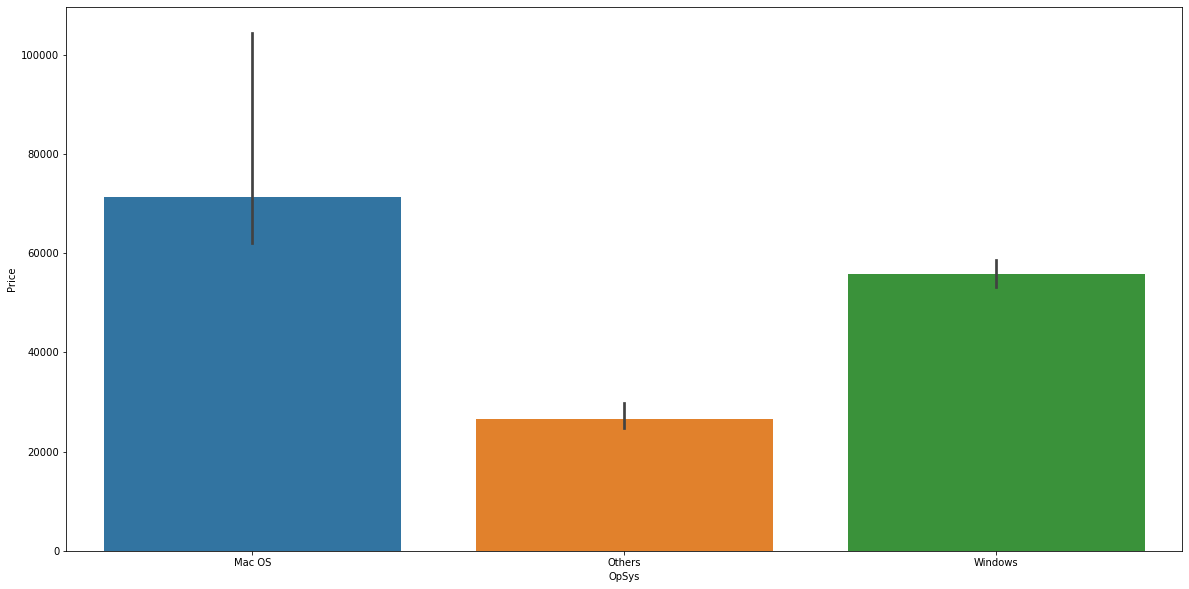

In [92]:
# Analysing OpSys with Price

plt.figure(figsize=(20,10))
sns.barplot(x=df['OpSys'],y=df['Price'],estimator=np.median)
plt.show()

In [93]:
# According to the chart we can observe that prices varies with OS

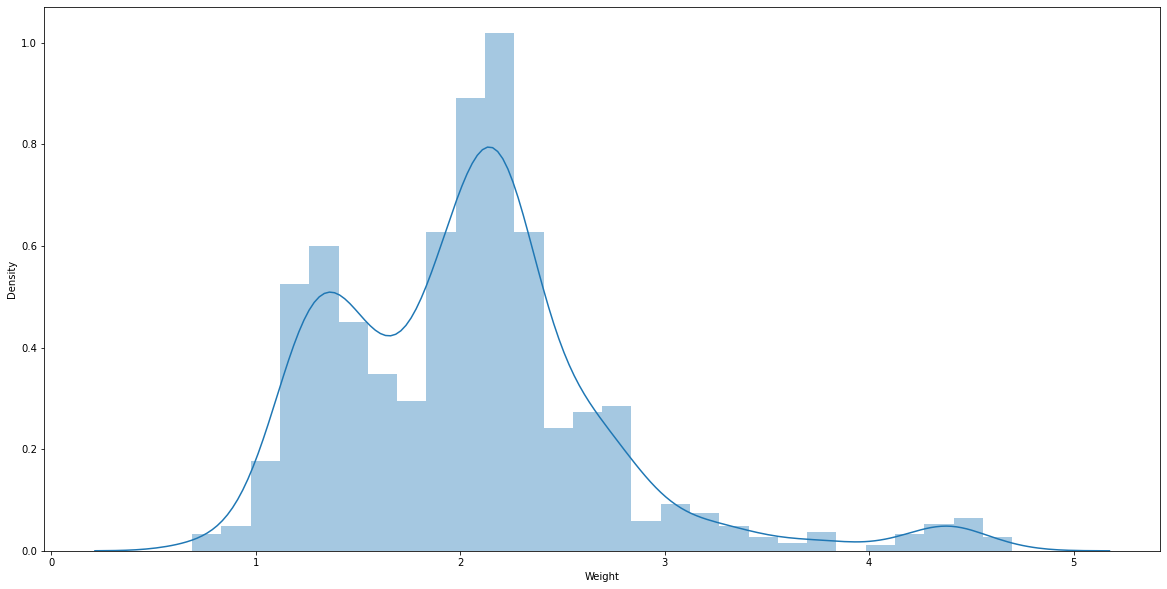

In [94]:
# Moving forward to analyse Weight feature
  
plt.figure(figsize=(20,10))
sns.distplot(df['Weight'])
plt.show()

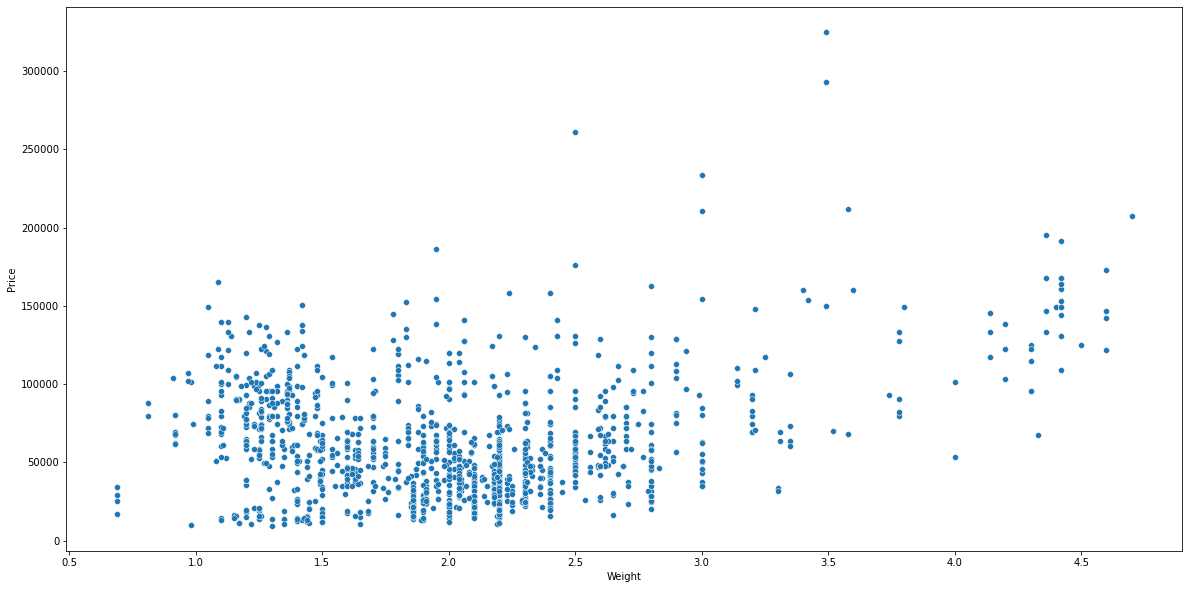

In [95]:
plt.figure(figsize=(20,10))
sns.scatterplot(x=df['Weight'],y=df['Price'])
plt.show()

In [96]:
# We can observe that their is minor linear relationship in data

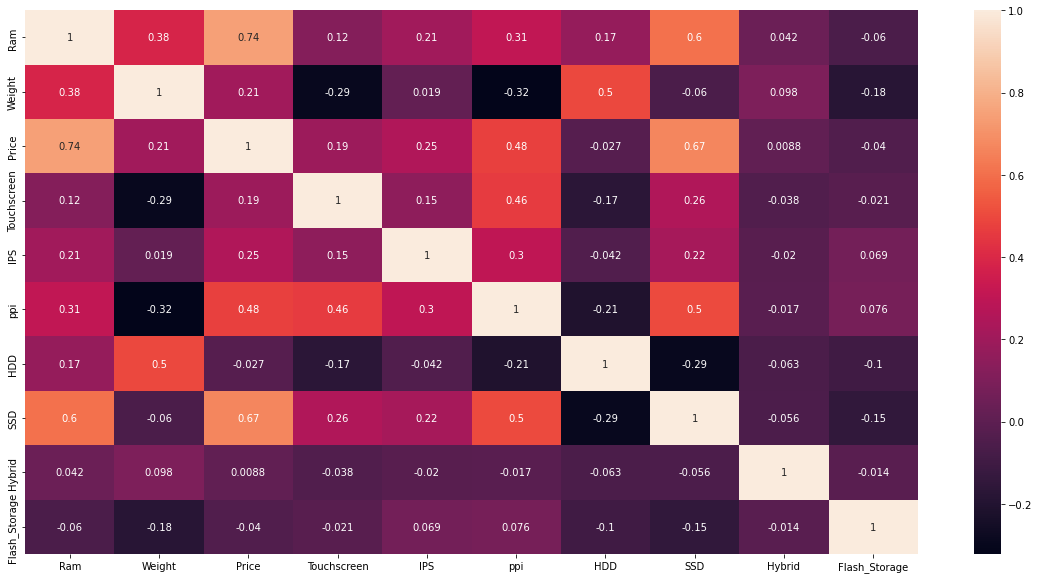

In [97]:
# Plotting Correlation heatmap

plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [98]:
# Printing simple correlation matrix with respect to price

df.corr()['Price']

Ram              0.742905
Weight           0.209867
Price            1.000000
Touchscreen      0.192917
IPS              0.253320
ppi              0.475368
HDD             -0.027189
SSD              0.666593
Hybrid           0.008765
Flash_Storage   -0.040067
Name: Price, dtype: float64

In [99]:
# There is no such multicollinearity exists in our data

# Checking for data types of feature
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1302 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company        1302 non-null   object 
 1   TypeName       1302 non-null   object 
 2   Ram            1302 non-null   int32  
 3   OpSys          1302 non-null   object 
 4   Weight         1302 non-null   float64
 5   Price          1302 non-null   float64
 6   Touchscreen    1302 non-null   int64  
 7   IPS            1302 non-null   int64  
 8   ppi            1302 non-null   float64
 9   CpuBrand       1302 non-null   object 
 10  HDD            1302 non-null   int64  
 11  SSD            1302 non-null   int64  
 12  Hybrid         1302 non-null   int64  
 13  Flash_Storage  1302 non-null   int64  
 14  GpuBrand       1302 non-null   object 
dtypes: float64(3), int32(1), int64(6), object(5)
memory usage: 157.7+ KB


In [100]:
# Analysing Flash and Hybrid storage

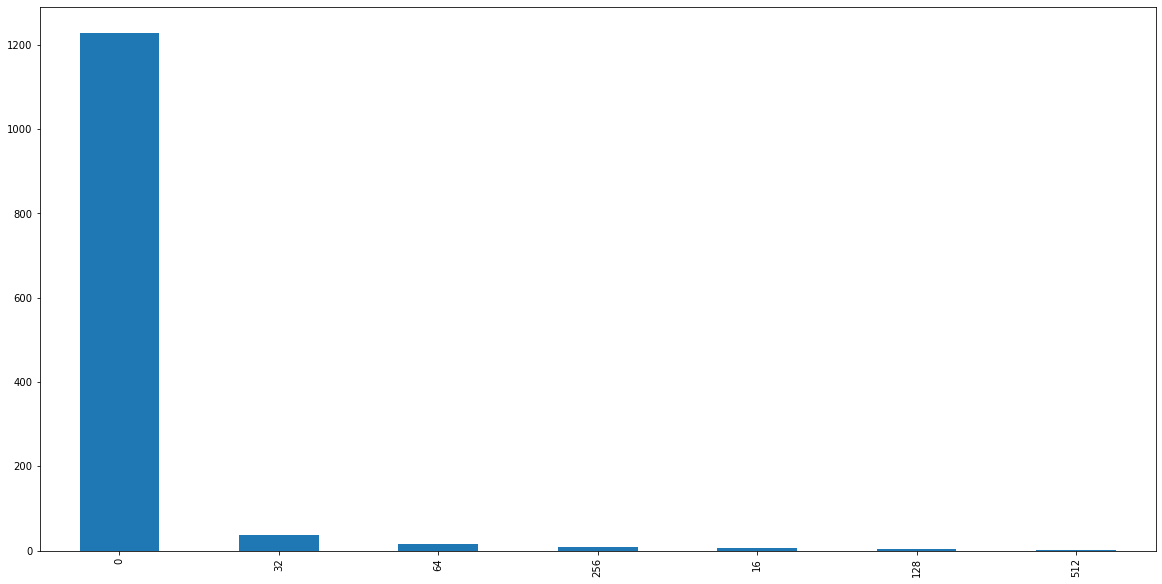

In [101]:
plt.figure(figsize=(20,10))
df.Flash_Storage.value_counts().plot(kind = 'bar')
plt.show()

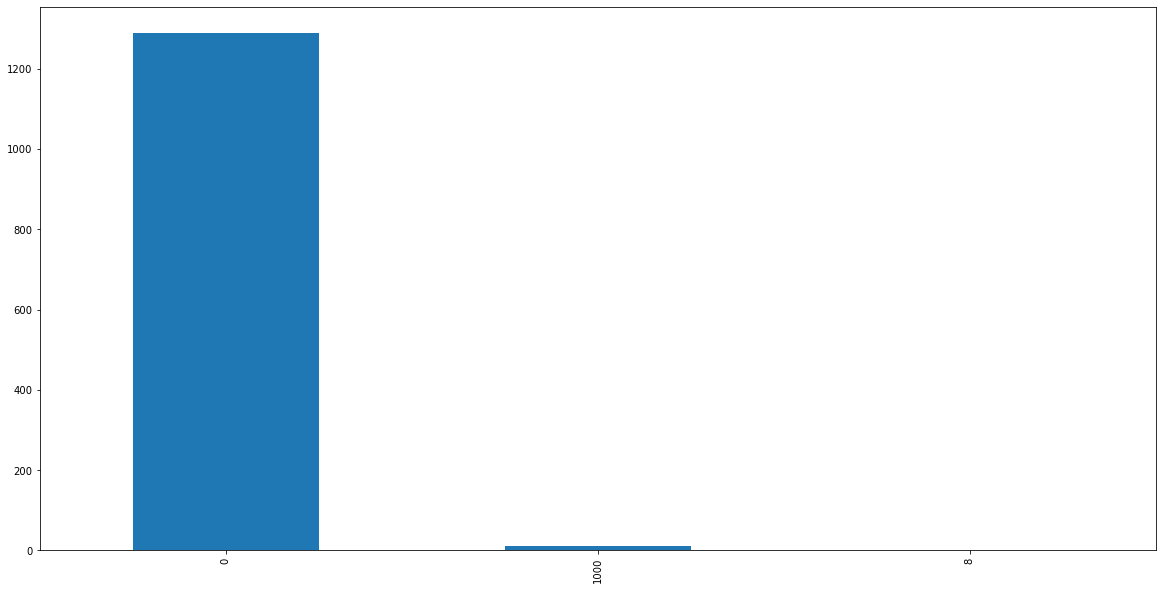

In [102]:
plt.figure(figsize=(20,10))
df.Hybrid.value_counts().plot(kind='bar')
plt.show()

In [103]:
# We can observe that we don't have enough non zero values of Flash or Hybrid, so we can drop them

df.drop(['Flash_Storage', 'Hybrid'],axis=1,inplace=True)

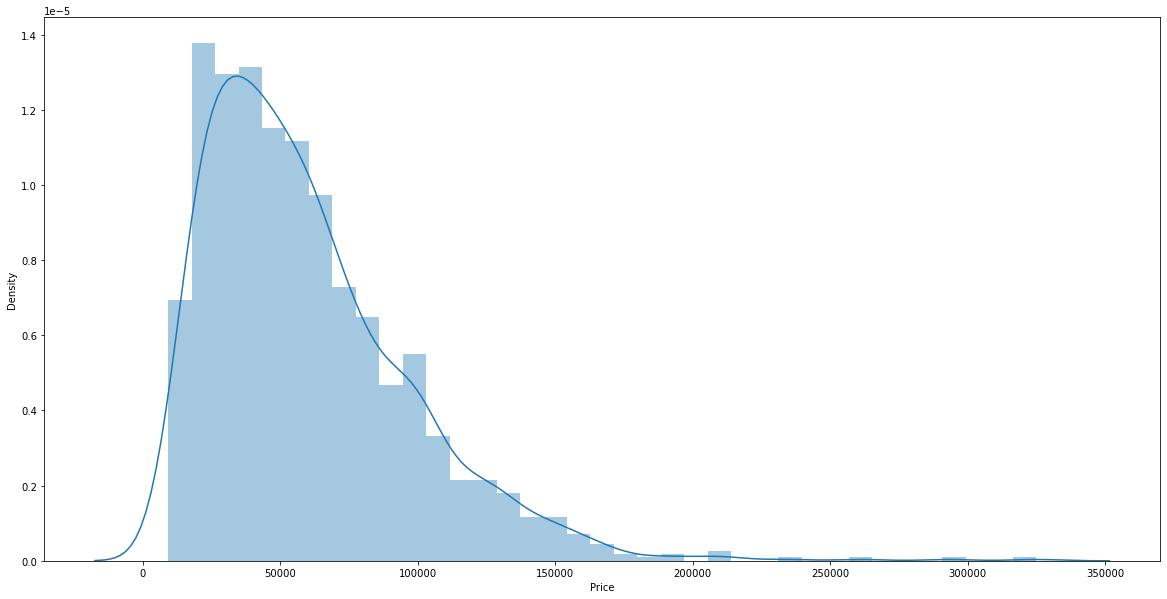

In [104]:
# Analysing target feature's distribution

plt.figure(figsize=(20,10))
sns.distplot(df['Price'])
plt.show()

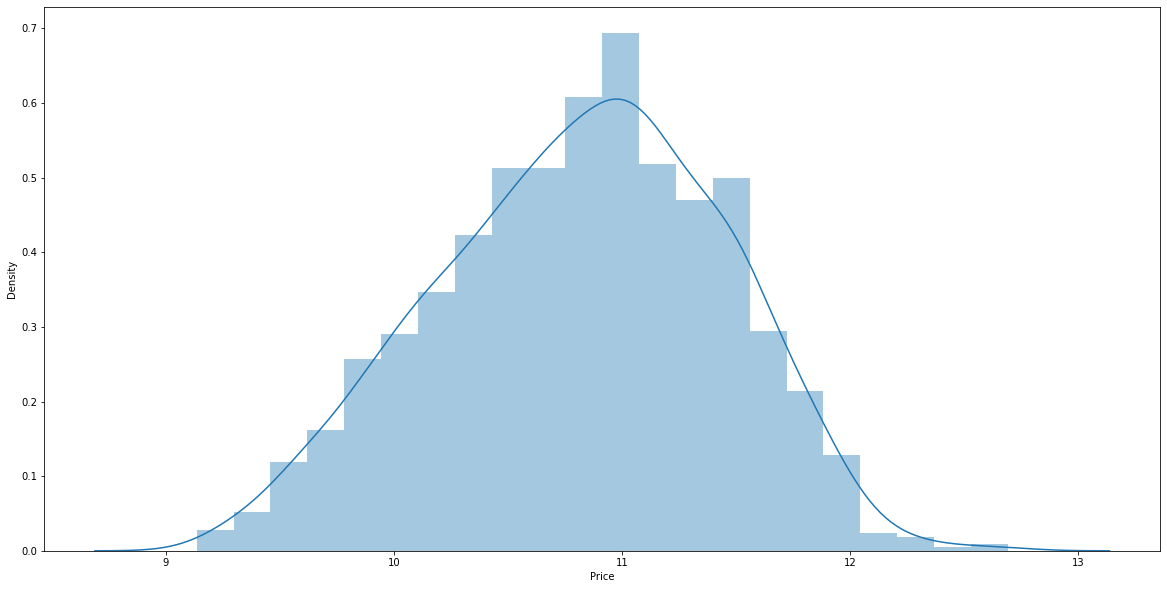

In [105]:
# It is having some skewed distribution which can be tranform it using log transformation

plt.figure(figsize=(20,10))
sns.distplot(np.log(df['Price']))
plt.show()

In [106]:
# Now our feature distribution is looking much better

In [107]:
X = df.drop('Price',axis=1)
Y = np.log(df['Price'])

In [108]:
X

,Company,TypeName,Ram,OpSys,Weight,Touchscreen,IPS,ppi,CpuBrand,HDD,SSD,GpuBrand
0,Apple,Ultrabook,8,Mac OS,1.37,0,1,226.983005,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,8,Mac OS,1.34,0,0,127.677940,Intel Core i5,0,0,Intel
2,HP,Notebook,8,Others,1.86,0,0,141.211998,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,16,Mac OS,1.83,0,1,220.534624,Intel Core i7,0,512,AMD
4,Apple,Ultrabook,8,Mac OS,1.37,0,1,226.983005,Intel Core i5,0,256,Intel
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4,Windows,1.80,1,1,157.350512,Intel Core i7,0,128,Intel
1299,Lenovo,2 in 1 Convertible,16,Windows,1.30,1,1,276.053530,Intel Core i7,0,512,Intel
1300,Lenovo,Notebook,2,Windows,1.50,0,0,111.935204,Other Intel Processor,0,0,Intel
1301,HP,Notebook,6,Windows,2.19,0,0,100.454670,Intel Core i7,1000,0,AMD


In [109]:
Y

0       11.175755
1       10.776777
2       10.329931
3       11.814476
4       11.473101
          ...    
1298    10.433899
1299    11.288115
1300     9.409283
1301    10.614129
1302     9.886358
Name: Price, Length: 1302, dtype: float64

## Model Building

In [110]:
# Train test split

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,Y,random_state=2,test_size=0.15)

In [111]:
x_train

,Company,TypeName,Ram,OpSys,Weight,Touchscreen,IPS,ppi,CpuBrand,HDD,SSD,GpuBrand
183,Toshiba,Notebook,8,Windows,2.00,0,0,100.454670,Intel Core i5,0,128,Intel
1141,MSI,Gaming,8,Windows,2.40,0,0,141.211998,Intel Core i7,1000,128,Nvidia
1049,Asus,Netbook,4,Others,1.20,0,0,135.094211,Other Intel Processor,0,0,Intel
1020,Dell,2 in 1 Convertible,4,Windows,2.08,1,1,141.211998,Intel Core i3,1000,0,Intel
878,Dell,Notebook,4,Windows,2.18,0,0,141.211998,Intel Core i5,1000,128,Nvidia
...,...,...,...,...,...,...,...,...,...,...,...,...
466,Acer,Notebook,4,Windows,2.20,0,0,100.454670,Intel Core i3,0,0,Nvidia
299,Asus,Ultrabook,16,Windows,1.63,0,0,141.211998,Intel Core i7,0,512,Nvidia
493,Acer,Notebook,8,Windows,2.20,0,0,100.454670,Amd Processor,1000,0,AMD
527,Lenovo,Notebook,8,Others,2.20,0,0,100.454670,Intel Core i3,2000,0,Nvidia


In [112]:
x_test

,Company,TypeName,Ram,OpSys,Weight,Touchscreen,IPS,ppi,CpuBrand,HDD,SSD,GpuBrand
248,HP,Notebook,4,Windows,1.49,0,1,165.632118,Intel Core i5,0,0,Intel
555,Asus,Notebook,4,Others,2.00,0,0,100.454670,Other Intel Processor,0,0,Intel
1251,HP,Notebook,4,Windows,1.86,0,0,100.454670,Amd Processor,0,0,AMD
547,Lenovo,Notebook,4,Others,2.15,0,0,141.211998,Intel Core i5,1000,0,Intel
885,HP,2 in 1 Convertible,4,Windows,1.28,1,0,165.632118,Intel Core i5,0,256,Intel
...,...,...,...,...,...,...,...,...,...,...,...,...
1129,HP,Gaming,8,Windows,3.35,0,1,127.335675,Intel Core i5,1000,128,Nvidia
172,Lenovo,Notebook,4,Others,2.20,0,0,100.454670,Amd Processor,0,0,AMD
322,Asus,Notebook,8,Windows,2.00,0,0,157.350512,Intel Core i7,0,256,Intel
996,HP,Ultrabook,8,Windows,1.11,1,1,165.632118,Intel Core i7,0,256,Intel


In [113]:
# Performing Column Transformation and creating a testing model for workflow check using Pipeline

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error

column_transformer = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,3,8,11])
],remainder='passthrough')

#x_train_scaled = pd.get_dummies(X,drop_first=True)
model = LinearRegression()

demo_pipe = Pipeline([
    ('step1',column_transformer),
    ('step2',model)
])

demo_pipe.fit(x_train,y_train)

y_pred = demo_pipe.predict(x_test)

#model.fit(x_train_scaled,y_train)
y_pred = demo_pipe.predict(x_test)
print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8010220318064452
MAE 0.21201335119224846


In [114]:
# Our dataset is working well and giving 80.6% of accuracy without any hyperparameter tuning using Linear Regression

In [115]:
x_train_scaled = column_transformer.fit_transform(x_train)
x_test_scaled = column_transformer.transform(x_test)

In [116]:
x_train_scaled.shape

(1106, 38)

In [117]:
x_test_scaled.shape

(196, 38)

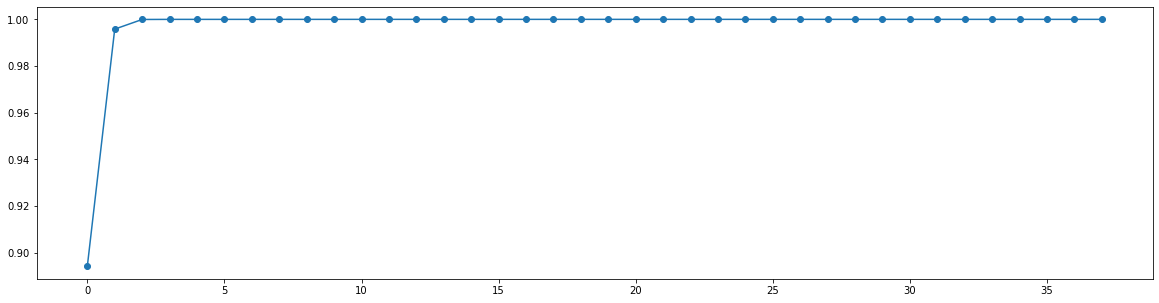

In [118]:
# Analysing whether PCA result any benefit in dimensionality reduction

from sklearn.decomposition import PCA
pca = PCA()
pca.fit_transform(x_train_scaled)

plt.figure(figsize=(20,5))
plt.plot(pca.explained_variance_ratio_.cumsum(),marker = 'o',)
plt.show()

In [119]:
# We can observe that with the help of only 5 features we can get 100% of the information of data but is it also the case with accuracy ?

# We will do some more analyses with respect to accuracy of Ridge model with different Dimensionality Reductions

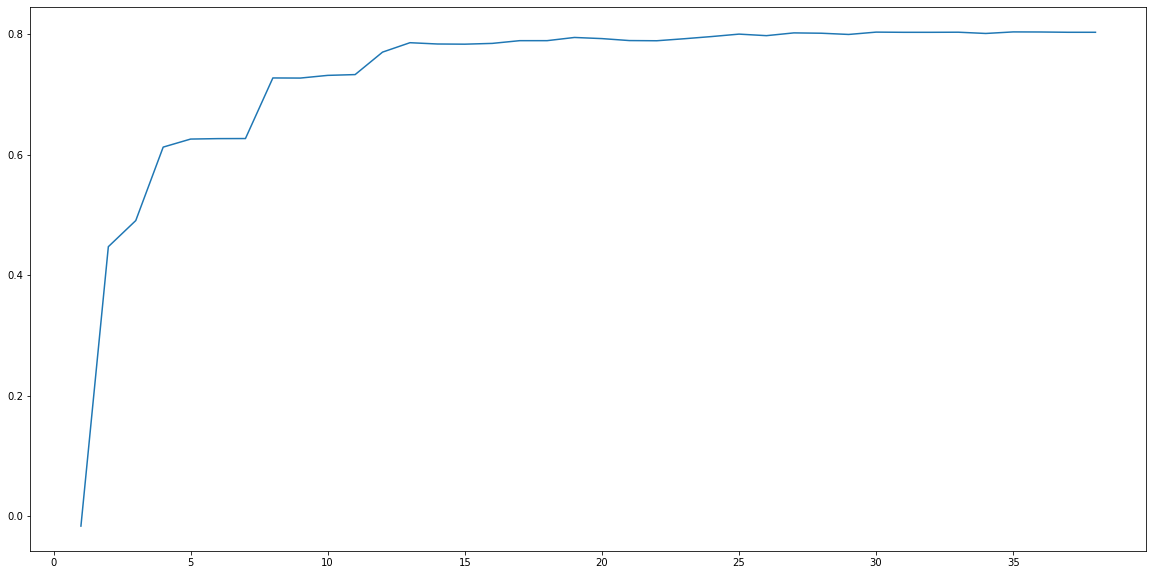

In [120]:
lr = LinearRegression()
from sklearn.linear_model import Ridge

lr = Ridge()
r2 = []

for i in range(1,39):
    pca = PCA(n_components=i)
    
    x_train_final = pca.fit_transform(x_train_scaled)
    x_test_final = pca.transform(x_test_scaled)
    lr.fit(x_train_final,y_train)

    y_pred = lr.predict(x_test_final)

    r2.append(r2_score(y_test,y_pred))
plt.figure(figsize=(20,10))
plt.plot(range(1,39),r2)
plt.show()

In [121]:
# We can observe that accuracy is not increasing very much after 30 PCA components

In [122]:
# importing some more models

from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

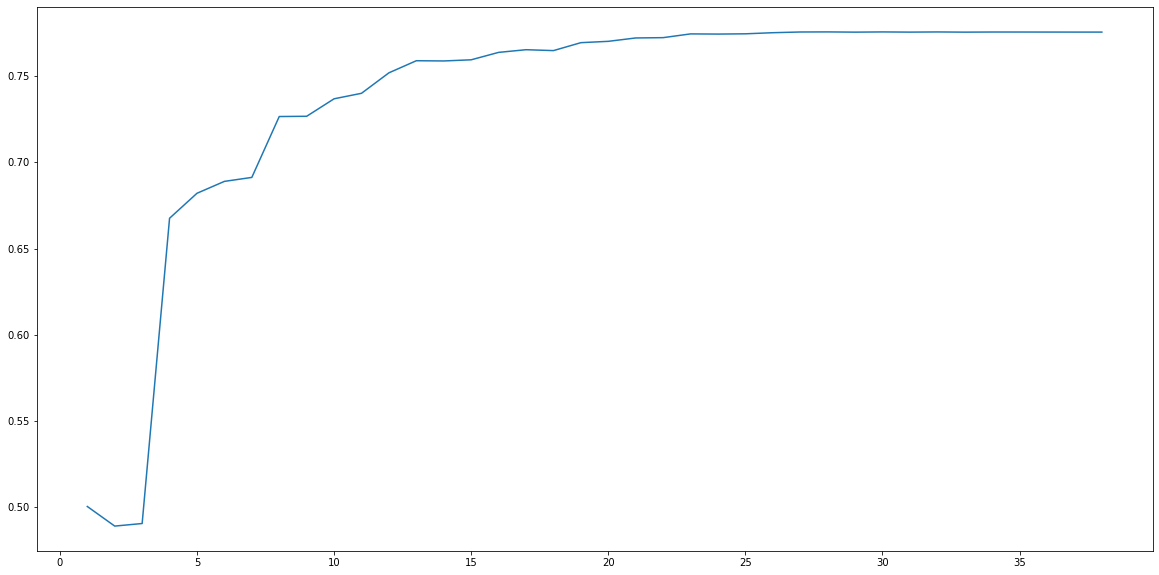

In [123]:
# building basic SVR model for checking whether increase in number of feature also increasing accuracy

svr = SVR(kernel='rbf',C=800,epsilon=0.1,degree=10)
r2 = []

for i in range(1,39):
    pca = PCA(n_components=i)
    
    x_train_final = pca.fit_transform(x_train_scaled)
    x_test_final = pca.transform(x_test_scaled)
    svr.fit(x_train_final,y_train)

    y_pred = svr.predict(x_test_final)

    r2.append(r2_score(y_test,y_pred))
plt.figure(figsize=(20,10))
plt.plot(range(1,39),r2)
plt.show()

In [124]:
# But according to the concept we are not going to use PCA because it would be better to use PCA when our datapoints are more related to 
# co-ordinates but we have more categorical variables than continuous hence, we are dropping the idea of using PCA

# KNN Model

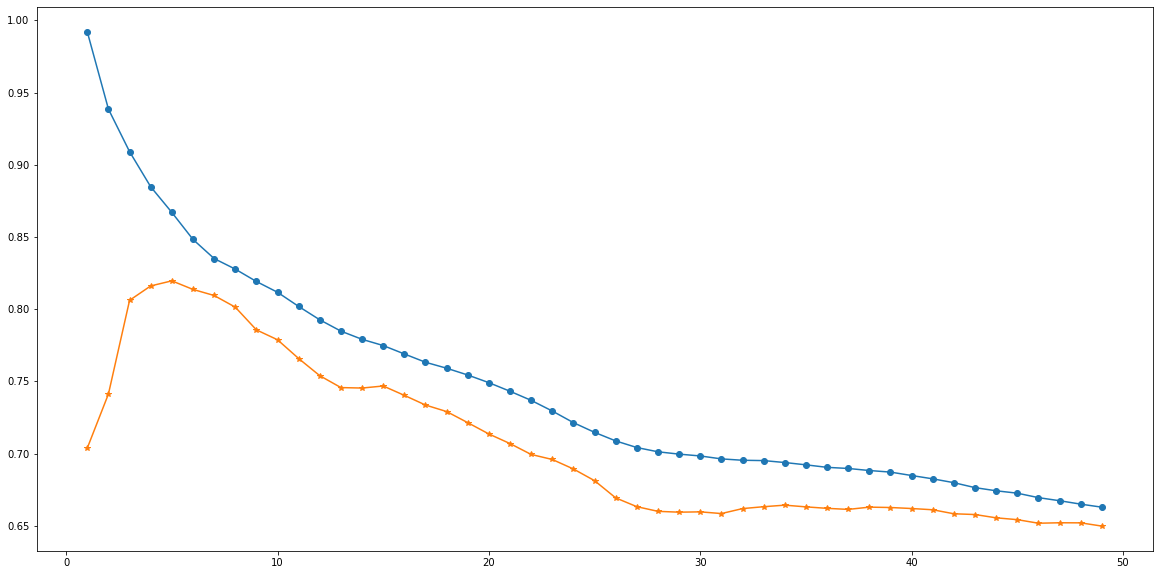

In [125]:
r2_knn_train = []
r2_knn_test = []
for i in range(1,50):
    knn = KNeighborsRegressor(n_neighbors=i,n_jobs=-1)
    knn.fit(x_train_scaled,y_train)
    knn_pred_train = knn.predict(x_train_scaled)
    knn_pred_test = knn.predict(x_test_scaled)
    r2_knn_train.append(r2_score(y_train,knn_pred_train))
    r2_knn_test.append(r2_score(y_test,knn_pred_test))

plt.figure(figsize=(20,10))
plt.plot(range(1,50),r2_knn_train,marker='o')
plt.plot(range(1,50),r2_knn_test,marker='*')
plt.show()

In [126]:
# According to chart, it is observed that our model is overfitted to train data in initial values of k,
# best approach is to get that K value having accuracy nearest to each other, at K value 11 we are getting more reliable prediction,
# Hence, we select 11 as K value

In [127]:
knn = KNeighborsRegressor(n_neighbors=7)
knn.fit(x_train_scaled,y_train)
knn_pred = knn.predict(x_test_scaled)
r2_score(y_test,knn_pred)

0.8094704843959295

# Support Vector Regressor Model

In [128]:
params = {
    'C' : [.1,.4 , .6 , 1,2,3,100,200,500],
    'gamma' : [.001,.1,.4,.004,.003],
    'kernel' : ['rbf','poly','linear','sigmoid'],
    'gamma' : ['scale','auto'],
    'tol' : np.arange(0.0000001,1,0.01),
    'epsilon' : np.arange(0.001,0.1),
                 }

svm_grid = RandomizedSearchCV(estimator = svr, param_distributions=params, cv=3,n_jobs=-1)

# It was taking os much computational time so I am taking manual approach to find best possible parameters

In [129]:
# Using svr with manually tuned hyperparameters

svm = SVR(kernel='rbf',C = 6000, epsilon=0.1, degree=5)
svm.fit(x_train_scaled,y_train)
print('Training score : ' , svm.score(x_train_scaled,y_train))
print('Testing score : ' , svm.score(x_test_scaled,y_test))

Training score :  0.860781016327529
Testing score :  0.807148347231756


# Decision Tree Model

In [130]:
dt_params = {
    'criterion' : ['squared_error','friedman_mse','absolute_error','poisson'],
    'splitter' : ['best','random'],
    'max_depth' : np.arange(5,30),
    'min_samples_split' : np.arange(1,20),
    'min_samples_leaf' : np.arange(1,20),
    'max_features' : ['auto','sqrt','log2']
}

dt_grid = RandomizedSearchCV(DecisionTreeRegressor(),param_distributions=dt_params, verbose=3, n_jobs=-1)
dt_grid.fit(x_train_scaled,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(estimator=DecisionTreeRegressor(), n_jobs=-1,
                   param_distributions={'criterion': ['squared_error',
                                                      'friedman_mse',
                                                      'absolute_error',
                                                      'poisson'],
                                        'max_depth': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21,
       22, 23, 24, 25, 26, 27, 28, 29]),
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19]),
                                        'min_samples_split': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19]),
                                        'splitter': ['best', 'random']},
                   verbose=3)

In [131]:
# After some iteration of Randomized Search CV, we got the best parameters

DecisionTree = DecisionTreeRegressor(splitter='best',
 min_samples_split = 13,
 min_samples_leaf= 9,
 max_features = 'auto',
 max_depth = 13,
 criterion = 'poisson')

In [132]:
DecisionTree.fit(x_train_scaled,y_train)
print(DecisionTree.score(x_train_scaled,y_train))
DecisionTree.score(x_test_scaled,y_test)

0.8861686106234588


0.8403528725538694

In [133]:
# Post pruning Decision Tree using ccp_alphas

ccp = DecisionTree.cost_complexity_pruning_path(x_train_scaled,y_train)['ccp_alphas']
ccp

array([0.00000000e+00, 4.37318278e-09, 5.34568721e-07, 6.90161645e-07,
       1.04219677e-06, 1.28715866e-06, 1.43725620e-06, 1.78963693e-06,
       2.07162150e-06, 2.43689019e-06, 2.95789101e-06, 3.35688591e-06,
       3.42985614e-06, 4.44063963e-06, 4.45818836e-06, 4.90753256e-06,
       5.28612992e-06, 5.39313572e-06, 6.01923897e-06, 6.29194189e-06,
       6.58726093e-06, 6.60241660e-06, 7.51083782e-06, 7.88696182e-06,
       8.39591742e-06, 8.55167560e-06, 9.26005381e-06, 1.06468947e-05,
       1.14563882e-05, 1.19118302e-05, 1.22138312e-05, 1.24034985e-05,
       1.28727714e-05, 1.33045881e-05, 1.33844466e-05, 1.42147327e-05,
       1.43629182e-05, 1.45799065e-05, 1.47782196e-05, 1.48927136e-05,
       1.50449822e-05, 1.51050226e-05, 1.82571395e-05, 2.07629761e-05,
       2.12348518e-05, 2.18986459e-05, 2.20277439e-05, 2.33201124e-05,
       2.46566300e-05, 2.63808077e-05, 2.95502125e-05, 2.95670368e-05,
       3.19021447e-05, 3.22737710e-05, 3.23548168e-05, 3.24386234e-05,
      

In [134]:
dt_train = []
dt_test = []
for c in ccp:
    DecisionTree = DecisionTreeRegressor(
     splitter='best',
     min_samples_split = 13,
     min_samples_leaf= 9,
     max_features = 'auto',
     max_depth = 13,
     criterion = 'poisson',
     ccp_alpha= c 
    )
    DecisionTree.fit(x_train_scaled,y_train)
    dt_train.append(DecisionTree.score(x_train_scaled,y_train))
    dt_test.append(DecisionTree.score(x_test_scaled,y_test))

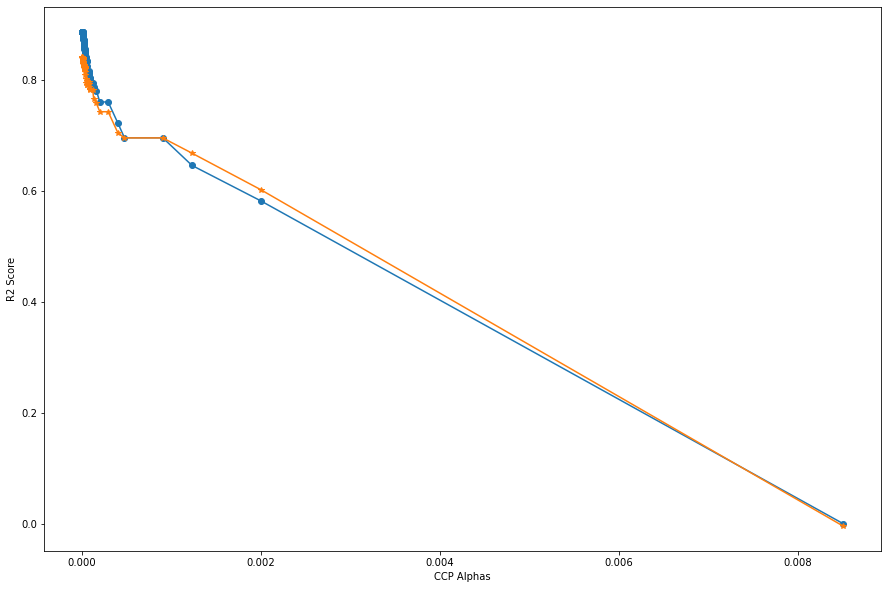

In [135]:
plt.figure(figsize=(15,10))
plt.plot(ccp,dt_train,marker='o')
plt.plot(ccp,dt_test,marker='*')
plt.xlabel('CCP Alphas')
plt.ylabel('R2 Score')
plt.show()

In [136]:
# 2.95670368e-05 is the ccp value which we can take into consideration and build model

In [137]:
dt = DecisionTreeRegressor(
     splitter='best',
     min_samples_split = 13,
     min_samples_leaf= 9,
     max_features = 'auto',
     max_depth = 13,
     criterion = 'poisson',
     ccp_alpha = 2.95670368e-05
)

In [138]:
dt.fit(x_train_scaled,y_train)

y_pred_dt_train = dt.predict(x_train_scaled)
y_pred_dt_test = dt.predict(x_test_scaled)
print(dt.score(x_train_scaled, y_train))
print(dt.score(x_test_scaled, y_test))

# R2 score and .score() both are same

0.8509485480751501
0.8235442874778981


# Random Forest Regressor

In [139]:
params = {
    'n_estimators' : [20,50,100,150,200],
    'random_state' : [1,3,10,15,60],
    'max_samples' : [0.3,0.4,0.5],
    'oob_score' : ['True'],
    'max_depth' : np.arange(5,40),
    'max_features' : np.arange(0.1,0.8,0.1)
    
}
rf = RandomizedSearchCV(RandomForestRegressor(), param_distributions=params, n_jobs=-1, cv=3)

In [140]:
# After some iterations of Randomized Search CV, it is observed that parameters given below are giving better accuracy
# with less overfitting in comparison to other parameters

In [141]:
rf_model = RandomForestRegressor(n_estimators=150,
                              random_state=4,
                              max_samples=0.3, # the number of samples to draw from X to train each base estimator
                              max_features=0.7, # the number of features to draw from X to train each base estimator
                              max_depth=31, # Depth of each base tree
                              oob_score=True # Out of bag score, for validation check
                         )

In [142]:
rf_model.fit(x_train_scaled,y_train)
print('Training score : ', rf_model.score(x_train_scaled,y_train))
print('Testing score : ', rf_model.score(x_test_scaled,y_test))
print('Out of Bag score : ', rf_model.oob_score_)

Training score :  0.9272337542938299
Testing score :  0.8749798207654822
Out of Bag score :  0.870208811669227


# Xgboost Regressor Model

In [143]:
from xgboost import XGBRegressor

# Fitting XgBoost without hyperparameter Tuning
xgb = XGBRegressor()
xgb.fit(x_train_scaled,y_train)
xgb.score(x_test_scaled,y_test)

0.8728284533443859

In [144]:
# Without tuning we are getting accuracy score of 88.1%, let's tune the hyperparamters

In [145]:
params = {
        #'lambda': np.arange(0.0001,10,0.001),
        #'alpha' : np.arange(0.0001,10,0.001),
        #'colsample_bytree' : [.1,.2,.3,.4,.5],
        'subsample' : [.1,.2,.3,.4,.5,.6,.7],
        'learning_rate' : np.arange(0.0001,5,0.005),
        'n_estimator' :[100,150,200,250,300],
        'max_depth' : np.arange(10,50,2),
        'random_state' : np.arange(1,50,2),
        'min_child_weight' : np.linspace(1,100,50)
    }

xgb = RandomizedSearchCV(XGBRegressor(),param_distributions=params,cv=5,n_jobs=-1)

In [146]:
# After some iterations of Randomized Search CV, it is observed that parameters given below are giving better accuracy
# with less overfitting in comparison to other parameters

In [147]:
xgboost = XGBRegressor(subsample = 0.7,
                     random_state =  47,
                     n_estimator = 100,
                     min_child_weight = 43.42857142857142,
                     max_depth = 42,
                     learning_rate =  0.24009999999999998
                      )

In [148]:
xgboost.fit(x_train_scaled,y_train)

[19:50:54] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "n_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.24009999999999998, max_bin=256,
             max_cat_to_onehot=4, max_delta_step=0, max_depth=42, max_leaves=0,
             min_child_weight=43.42857142857142, missing=nan,
             monotone_constraints='()', n_estimator=100, n_estimators=100,
             n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=47,
             reg_alpha=0, ...)

In [149]:
print('Training score : ' , xgboost.score(x_train_scaled,y_train))
print('Testing score : ', xgboost.score(x_test_scaled,y_test))

Training score :  0.9258497185203987
Testing score :  0.871096770067359


# Stacking Model

In [150]:
from sklearn.ensemble import StackingRegressor

models = [('random_forest', rf), ('xgboost', xgboost),]
#stack = StackingRegressor(estimators=models, cv = 5, n_jobs=-1, final_estimator = xgboost)
stack = StackingRegressor(estimators=models, cv = 5, n_jobs=-1, final_estimator = rf)

In [151]:
stack.fit(x_train_scaled,y_train)

StackingRegressor(cv=5,
                  estimators=[('random_forest',
                               RandomizedSearchCV(cv=3,
                                                  estimator=RandomForestRegressor(),
                                                  n_jobs=-1,
                                                  param_distributions={'max_depth': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21,
       22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38,
       39]),
                                                                       'max_features': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7]),
                                                                       'max_samples': [0.3,
                                                                                       0.4,
                                                                                       0.5],
                                                                       'n_estim...
                                                     estimator=RandomForestRegressor(),
                                                     n_jobs=-1,
                                                     param_distributions={'max_depth': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21,
       22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38,
       39]),
                                                                          'max_features': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7]),
                                                                          'max_samples': [0.3,
                                                                                          0.4,
                                                                                          0.5],
                                                                          'n_estimators': [20,
                                                                                           50,
                                                                                           100,
                                                                                           150,
                                                                                           200],
                                                                          'oob_score': ['True'],
                                                                          'random_state': [1,
                                                                                           3,
                                                                                           10,
                                                                                           15,
                                                                                           60]}),
                  n_jobs=-1)

In [152]:
stack.score(x_train_scaled,y_train)

0.9415185601876463

In [153]:
stack.score(x_test_scaled,y_test)

0.8682521303636509

In [154]:
# Stacking model is not giving us best possible result, hence we are finalizing xgboost model for deployment.

#  Creating pipeline with column transformer and Random Forest model

In [160]:
df.head()

,Company,TypeName,Ram,OpSys,Weight,Price,Touchscreen,IPS,ppi,CpuBrand,HDD,SSD,GpuBrand
0,Apple,Ultrabook,8,Mac OS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,8,Mac OS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel
2,HP,Notebook,8,Others,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,16,Mac OS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD
4,Apple,Ultrabook,8,Mac OS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel


In [155]:
# Column transformer
column_transformer = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,3,8,11])
],remainder='passthrough')

# Creating Random Forest Model with best tuned hyperparamters
rf_model = RandomForestRegressor(n_estimators=150,
                              random_state=4,
                              max_samples=0.3, # the number of samples to draw from X to train each base estimator
                              max_features=0.7, # the number of features to draw from X to train each base estimator
                              max_depth=31, # Depth of each base tree
                              oob_score=True # Out of bag score, for validation check
                         )

# Creating pipeline with column transformer and xgboost model
pipe1 = Pipeline([
    ('step1', column_transformer),
    ('step2', rf_model)
])

# Fitting pipeline
pipe1.fit(x_train,y_train)

Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('col_tnf',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  [0, 1, 3, 8, 11])])),
                ('step2',
                 RandomForestRegressor(max_depth=31, max_features=0.7,
                                       max_samples=0.3, n_estimators=150,
                                       oob_score=True, random_state=4))])

# Creating pickle file

In [161]:
import pickle 

pickle.dump(df, open('df.pkl','wb'))
pickle.dump(pipe1, open('pipe1.pkl', 'wb'))

In [162]:
pipe = pickle.load(open('pipe1.pkl','rb'))

In [163]:
pipe.score(x_test,y_test)

0.8749798207654822

In [167]:
np.exp(pipe.predict([['Apple','Ultrabook',8,'Mac OS',1.37,0,1,226,'Intel Core i5',0,256,'Intel']]))

array([81103.45507883])

# End of Project